In [129]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qutip import *
from scipy import constants
import math as m
from qutip import superoperator

In [131]:
## Style of plots
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

# Only Spins

In [132]:
# Parameters Definition
N = 3           # Number of qubits
w = np.ones(N)

######### Time evolution
tlist = np.linspace(0, 13, 1300)


In [133]:
######### Initial State
p2 = 0.2
p3 = 0.3
p4 = 0.4
p5 = 0.5

p02 = Qobj(np.array([[p2,0.96*p2],[0.96*p2,1-p2]]))
p03 = Qobj(np.array([[p3,0.96*p3],[0.96*p3,1-p3]]))
p04 = Qobj(np.array([[p4,0.96*p4],[0.96*p4,1-p4]]))
p05 = Qobj(np.array([[p5,0.96*p5],[0.96*p5,1-p5]]))


s1 = tensor([p02,p02,p02])
s2 = tensor([p02,p02,p04])
s3 = tensor([p02,p03,p04])
s4 = tensor([p03,p05,p05])

In [134]:
### System construction

sx_list, sy_list, sz_list = [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))


# Coupling strength
J = np.array([1,1,1])


# Construct the hamiltonian
H_j = H_w = 0

for n in range(N - 1):
    H_j += -0.5 * J[n] * sx_list[n] * sx_list[n + 1]
    H_j += -0.5 * J[n] * sy_list[n] * sy_list[n + 1]

#for i in range(N):
#    H_w += w[i] * (sz_list[i] * sz_list[i])

H = H_j + H_w

# Hamiltonian to superoperator
L0 = superoperator.liouvillian(H)

# Construct dissipation superoperator

L_diss = 0
#L_diss += lindblad_dissipator(np.sqrt(b*J_max)* sm_list[i_site]) 


########### Ensamble hole Liouvillian
L = L0  + L_diss 

## Simulation

In [135]:
### Run simulation and get results

# Solution s1
result1 = mesolve(L, s1, tlist, [],[])

# Solution s2
result2 = mesolve(L, s2, tlist, [],[])

# Soluiton s3
result3 = mesolve(L, s3, tlist, [],[])

# Soluiton s4
result4 = mesolve(L, s4, tlist, [],[])

## Dynamics

In [136]:
exp_sz_dephase = expect(sz_list, result1.states)

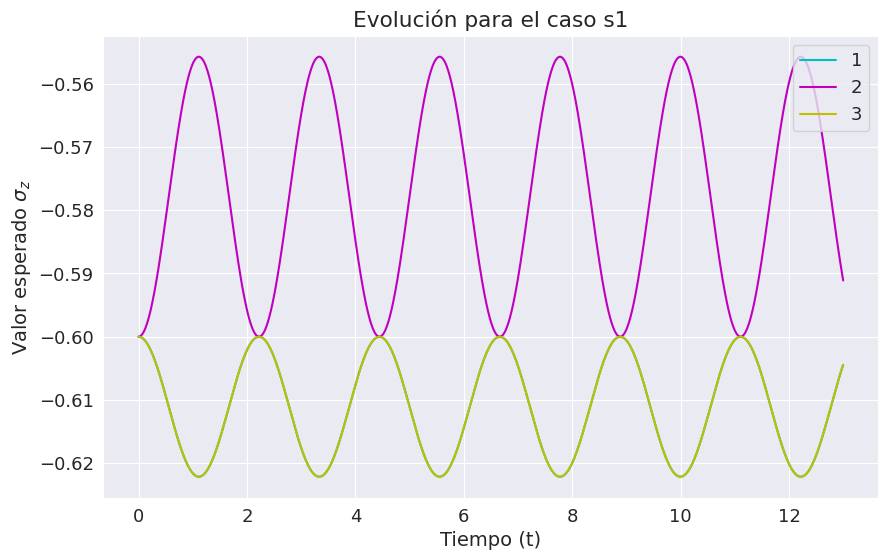

In [137]:
exp_sz_dephase1 = expect(sz_list, result1.states)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_dephase1[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_dephase1[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_dephase1[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s1")
plt.savefig("Evolution_s1")

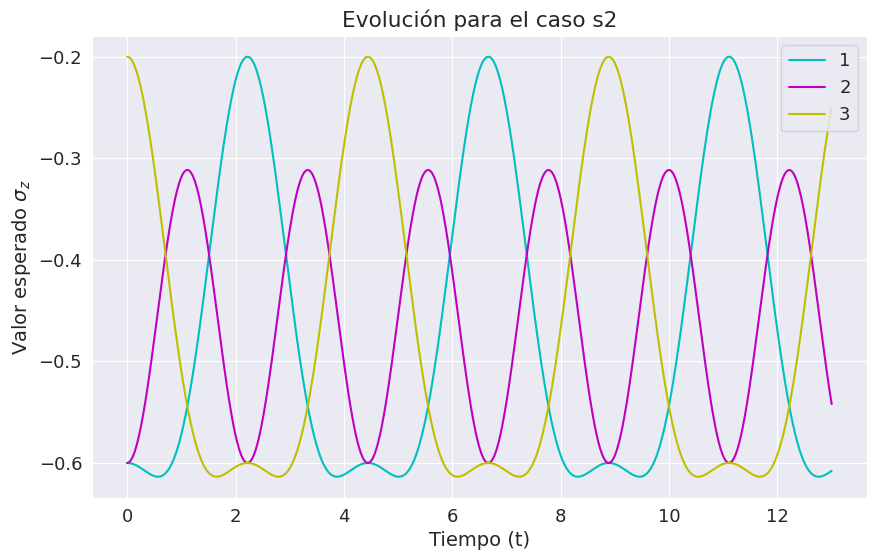

In [138]:
exp_sz_dephase2 = expect(sz_list, result2.states)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_dephase2[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_dephase2[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_dephase2[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s2")
plt.savefig("Evolution_s2")

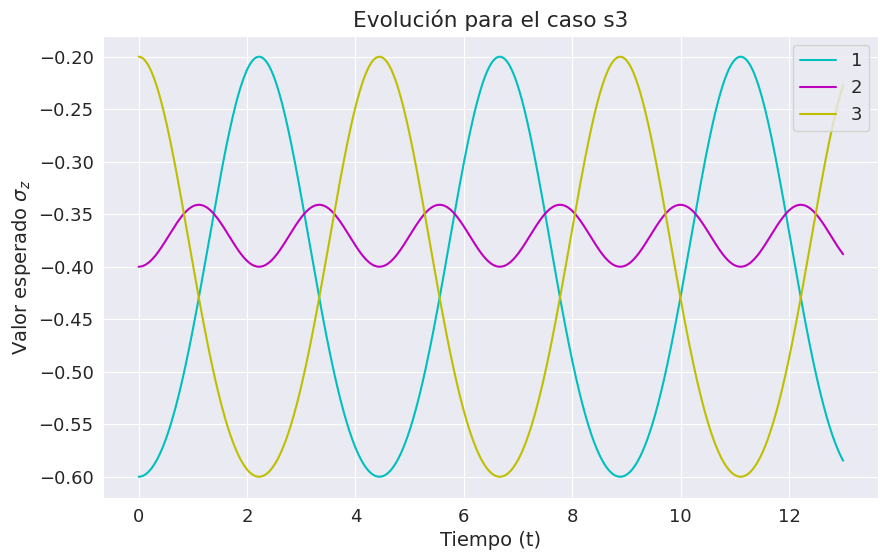

In [139]:
exp_sz_dephase3 = expect(sz_list, result3.states)
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_dephase3[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_dephase3[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_dephase3[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s3")
plt.savefig("Evolution_s3")

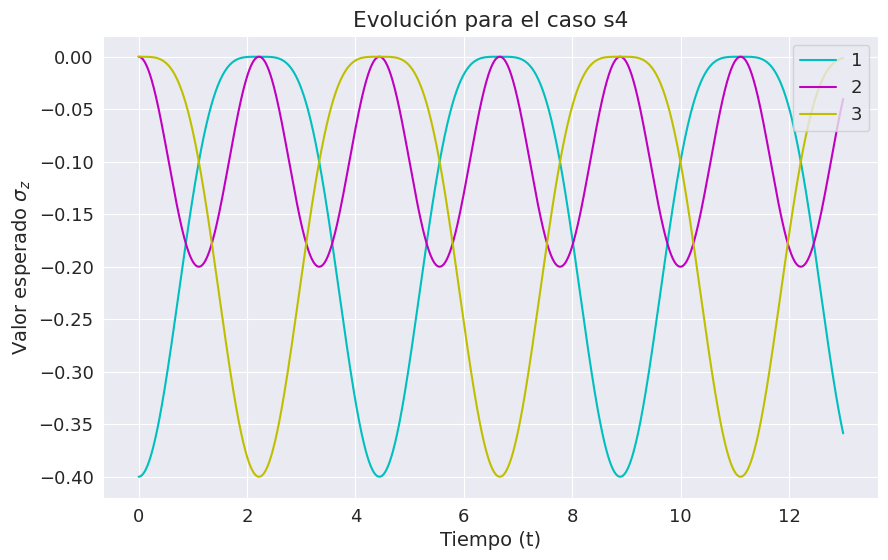

In [140]:
exp_sz_dephase4 = expect(sz_list, result4.states)
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_dephase4[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_dephase4[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_dephase4[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s4")
plt.savefig("Evolution_s4")

## Populations

In [141]:
num_rows = len(result1.states)

population_s1 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s1[i] = result1.states[i].diag()

population_s2 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s2[i] = result2.states[i].diag()

population_s3 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s3[i] = result3.states[i].diag()

population_s4 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s4[i] = result4.states[i].diag()

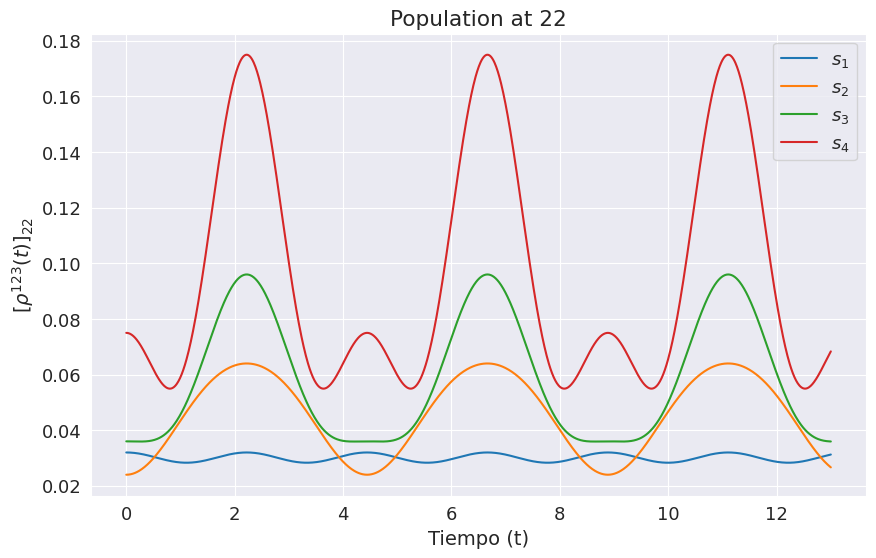

In [142]:
# Population at 22
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,1] , label=r"$s_1$")
ax.plot(list(tlist), population_s2[:,1] , label=r"$s_2$")
ax.plot(list(tlist), population_s3[:,1] , label=r"$s_3$")
ax.plot(list(tlist), population_s4[:,1] , label=r"$s_4$")



ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{22}$')
ax.set_title(f"Population at 22")
plt.savefig("Population22")

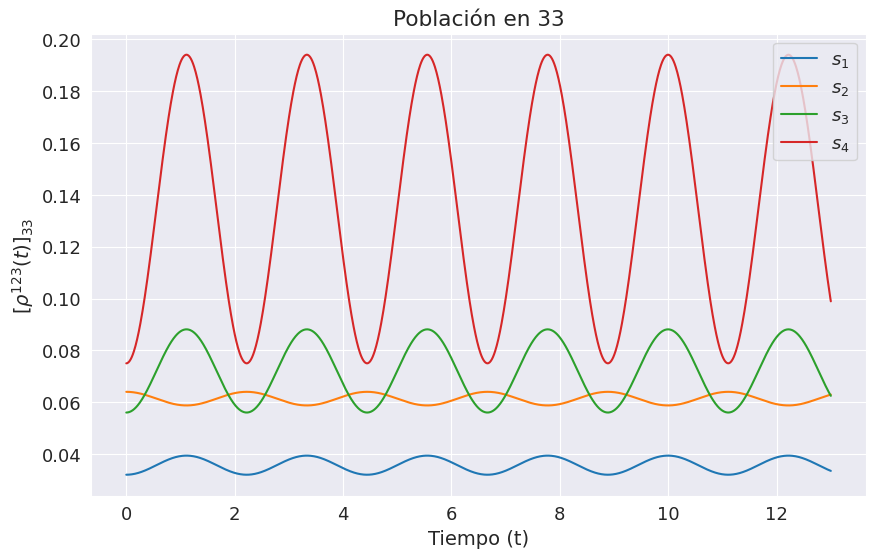

In [143]:
# Population at 33
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,2] , label=r"$s_1$")
ax.plot(list(tlist), population_s2[:,2] , label=r"$s_2$")
ax.plot(list(tlist), population_s3[:,2] , label=r"$s_3$")
ax.plot(list(tlist), population_s4[:,2] , label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{33}$')
ax.set_title(f"Población en 33")
plt.savefig("Population33")

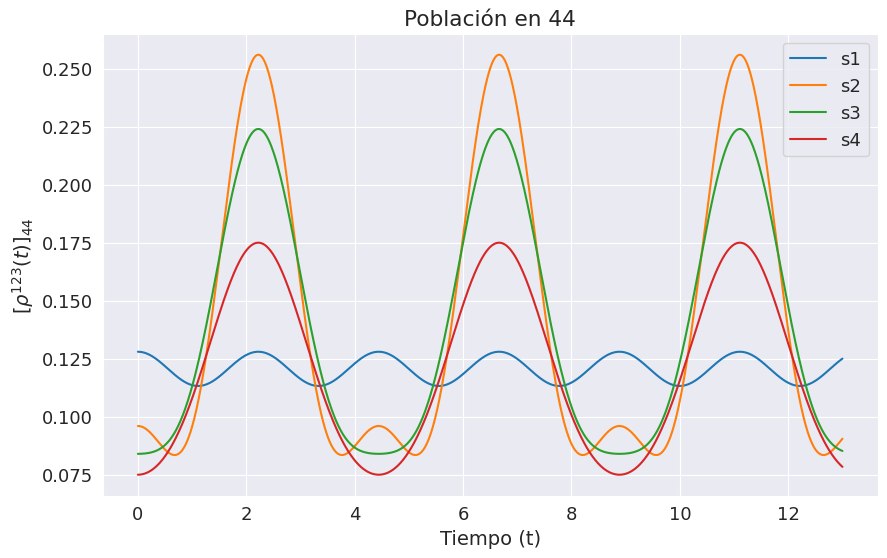

In [144]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,3] , label="s1")
ax.plot(list(tlist), population_s2[:,3] , label="s2")
ax.plot(list(tlist), population_s3[:,3] , label="s3")
ax.plot(list(tlist), population_s4[:,3] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{44}$')
ax.set_title(f"Población en 44")
plt.savefig("Population44")

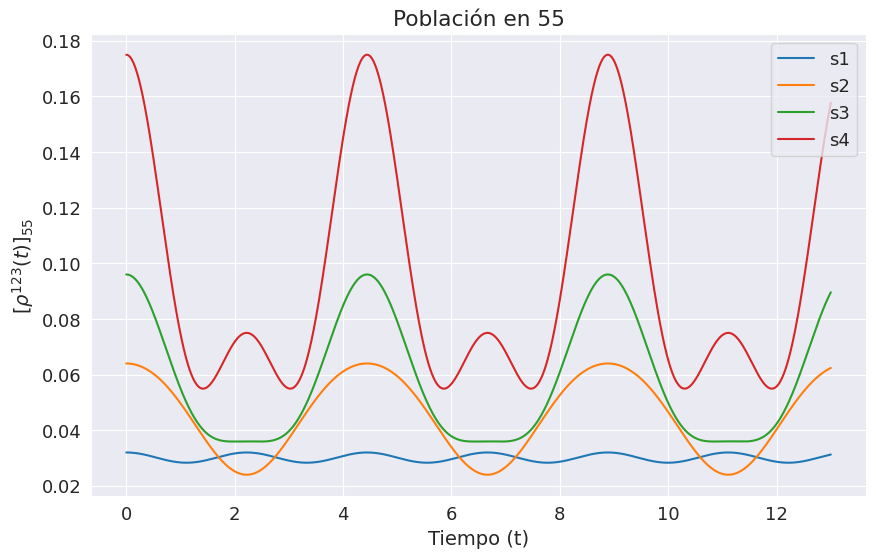

In [145]:
# Population at 55
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,4] , label="s1")
ax.plot(list(tlist), population_s2[:,4] , label="s2")
ax.plot(list(tlist), population_s3[:,4] , label="s3")
ax.plot(list(tlist), population_s4[:,4] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{55}$')
ax.set_title(f"Población en 55")
plt.savefig("Population55")

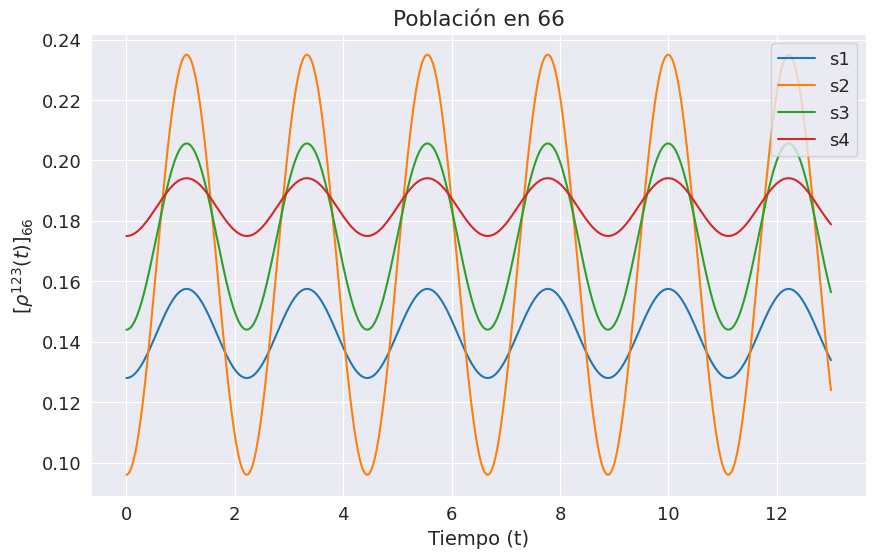

In [146]:
# Population at 66
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,5] , label="s1")
ax.plot(list(tlist), population_s2[:,5] , label="s2")
ax.plot(list(tlist), population_s3[:,5] , label="s3")
ax.plot(list(tlist), population_s4[:,5] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{66}$')
ax.set_title(f"Población en 66")
plt.savefig("Population66")

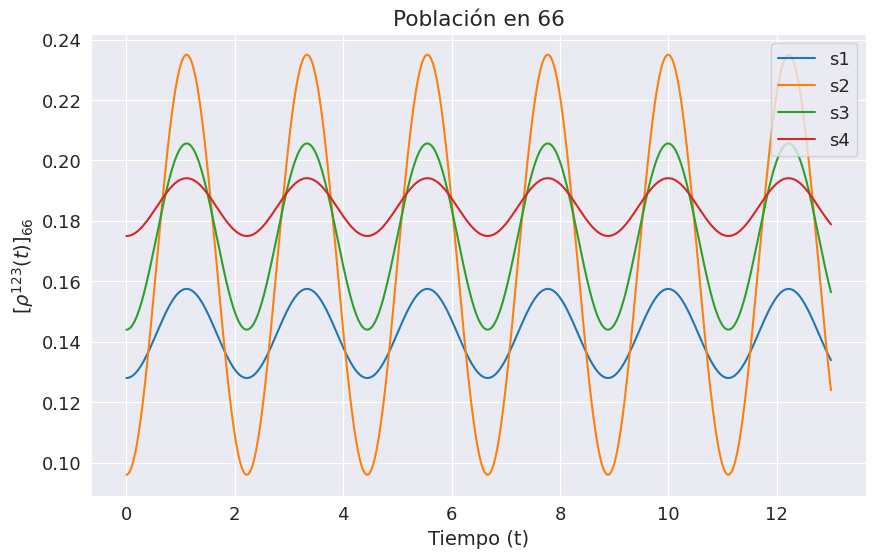

In [147]:
# Population at 66
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,5] , label="s1")
ax.plot(list(tlist), population_s2[:,5] , label="s2")
ax.plot(list(tlist), population_s3[:,5] , label="s3")
ax.plot(list(tlist), population_s4[:,5] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{66}$')
ax.set_title(f"Población en 66")
plt.savefig("Population66")

## von Neumann entropy

In [148]:
from scipy.linalg import logm, expm

In [149]:
def neuman_entropy(result):

  num_rows = len(result.states)
  neuman_entropy = np.empty(num_rows)

  for i in range(num_rows):
    rho = result.states[i].full()

    rho_log = np.matmul(rho, np.log2(rho))
    neuman_entropy[i] = -np.trace(rho_log)

  return neuman_entropy

In [150]:
entropy_s1 = neuman_entropy(result1)
entropy_s2 = neuman_entropy(result2)
entropy_s3 = neuman_entropy(result3)
entropy_s4 = neuman_entropy(result4)

<ipython-input-149-6b012c695e0a>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  neuman_entropy[i] = -np.trace(rho_log)


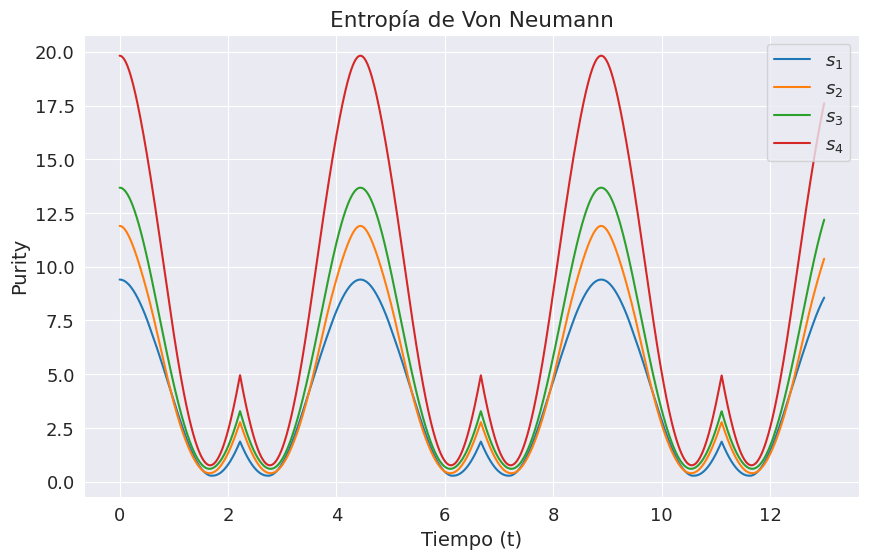

In [151]:
# Von Neuman entorpy as funtion of time
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), entropy_s1 ,  label=r"$s_1$")
ax.plot(list(tlist), entropy_s2 ,  label=r"$s_2$")
ax.plot(list(tlist), entropy_s3 ,  label=r"$s_3$")
ax.plot(list(tlist), entropy_s4 ,  label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Purity')
ax.set_title(f"Entropía de Von Neumann")
plt.savefig("Entropy")

## Concurrence betwwen 2 qbits

In [152]:
def concurrence(eigenvalues):
  eigenvalues = abs(eigenvalues)
  lambda1 = eigenvalues.max()
  ls_eigen = list(eigenvalues)
  ls_eigen.remove(max(ls_eigen))
  diference = lambda1 - sum(ls_eigen)

  return diference

In [153]:
def flip_matrix(rho, A, B):
  sigmay_2 = tensor(sigmay(), sigmay())
  rho_ij = rho.ptrace([A,B]).conj()
  fliped = sigmay_2 * rho_ij * sigmay_2

  return fliped

In [154]:
con_12_s1 = []
for i in range(len(result1.states)):
  rhoFliped = flip_matrix(result1.states[i], 0,1)
  rho_rhoFliped = result1.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s1.append(concurrence(values))

con_12_s2 = []
for i in range(len(result2.states)):
  rhoFliped = flip_matrix(result2.states[i], 0,1)
  rho_rhoFliped = result2.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s2.append(concurrence(values))

con_12_s3 = []
for i in range(len(result3.states)):
  rhoFliped = flip_matrix(result3.states[i], 0,1)
  rho_rhoFliped = result3.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s3.append(concurrence(values))

con_12_s4 = []
for i in range(len(result4.states)):
  rhoFliped = flip_matrix(result4.states[i], 0,1)
  rho_rhoFliped = result4.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s4.append(concurrence(values))

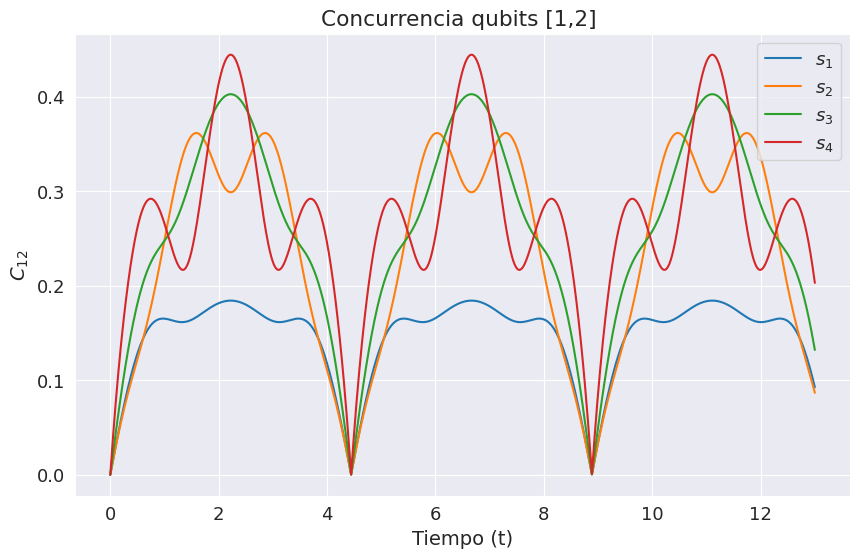

In [155]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), con_12_s1 - con_12_s1[0],  label=r"$s_1$")
ax.plot(list(tlist), con_12_s2 - con_12_s2[0],  label=r"$s_2$")
ax.plot(list(tlist), con_12_s3 - con_12_s3[0],  label=r"$s_3$")
ax.plot(list(tlist), con_12_s4 - con_12_s4[0],  label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{12}$')
ax.set_title(f"Concurrencia qubits [1,2] ")
plt.savefig("Concurrence12")

In [156]:
con_12_s4[0] - con_12_s4[0]

0.0

## Concurrence in three qubits

In [157]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

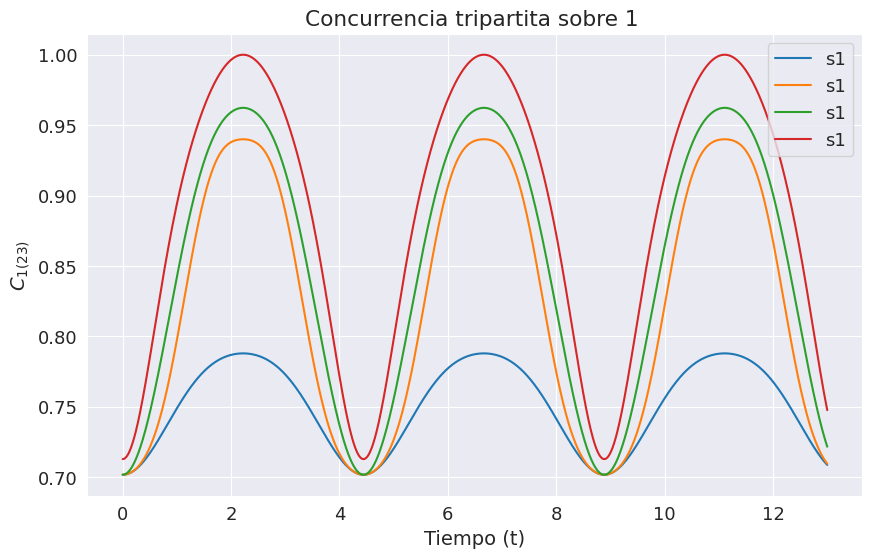

In [158]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 ,  label=r"$s_1$")
ax.plot(list(tlist), cc2 ,  label=r"$s_2$")
ax.plot(list(tlist), cc3 ,  label=r"$s_3$")
ax.plot(list(tlist), cc4 ,  label=r"$s_4$")


ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{1(23)}$')
ax.set_title(f"Concurrencia tripartita sobre 1 ")
plt.savefig("Concurrence1")

In [159]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

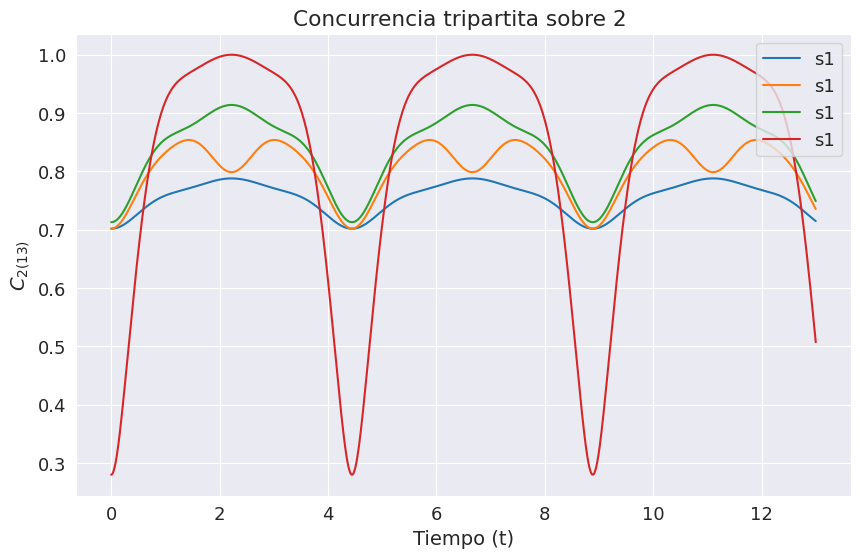

In [160]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s1")
ax.plot(list(tlist), cc3 , label="s1")
ax.plot(list(tlist), cc4 , label="s1")


ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{2(13)}$')
ax.set_title(f"Concurrencia tripartita sobre 2 ")
plt.savefig("Concurrence2")

# Chain coupled to reservoir

In [161]:
# disspation rate
gamma = 0.1 * np.ones(N)

# collapse operators
c_ops = [np.sqrt(gamma[i]) * sz_list[i] for i in range(N)]


## Simulation

In [162]:
### Run simulation and get results

# Solution s1
result1_diss = mesolve(L, s1, tlist, c_ops,[])

# Solution s2
result2_diss = mesolve(L, s2, tlist, c_ops,[])

# Soluiton s3
result3_diss = mesolve(L, s3, tlist, c_ops,[])

# Soluiton s4
result4_diss = mesolve(L, s4, tlist, c_ops,[])

## Dynamics

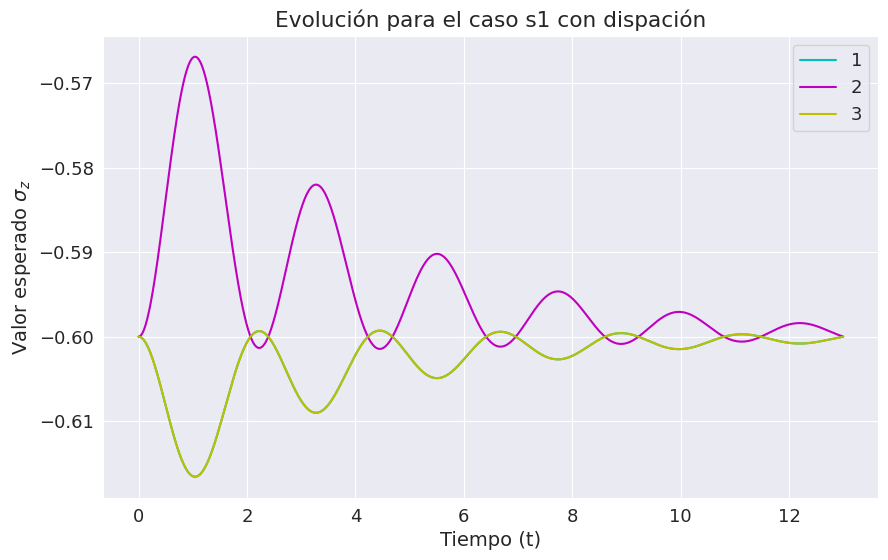

In [163]:
exp_sz_diss1 = expect(sz_list, result1_diss.states)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_diss1[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_diss1[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_diss1[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s1 con dispación")
plt.savefig("Evolution_s1_diss")

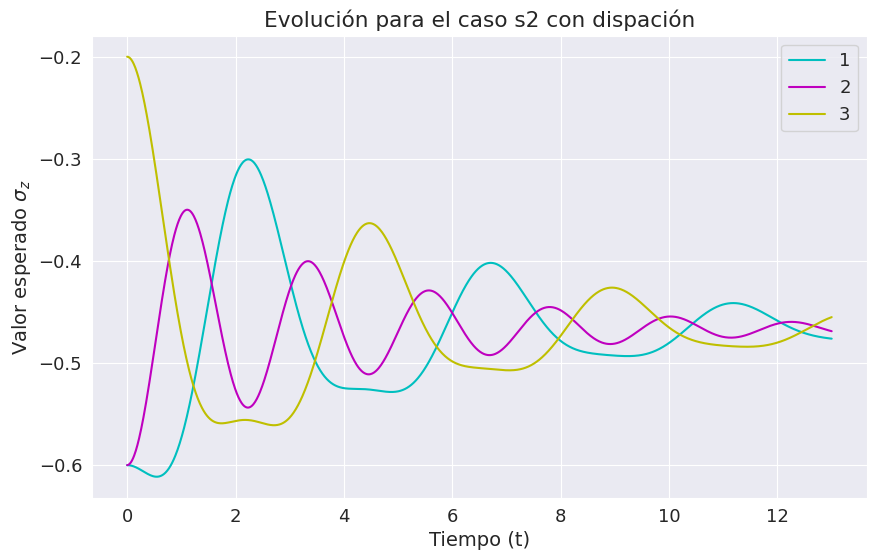

In [164]:
exp_sz_diss2 = expect(sz_list, result2_diss.states)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_diss2[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_diss2[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_diss2[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s2 con dispación")
plt.savefig("Evolution_s2_diss")

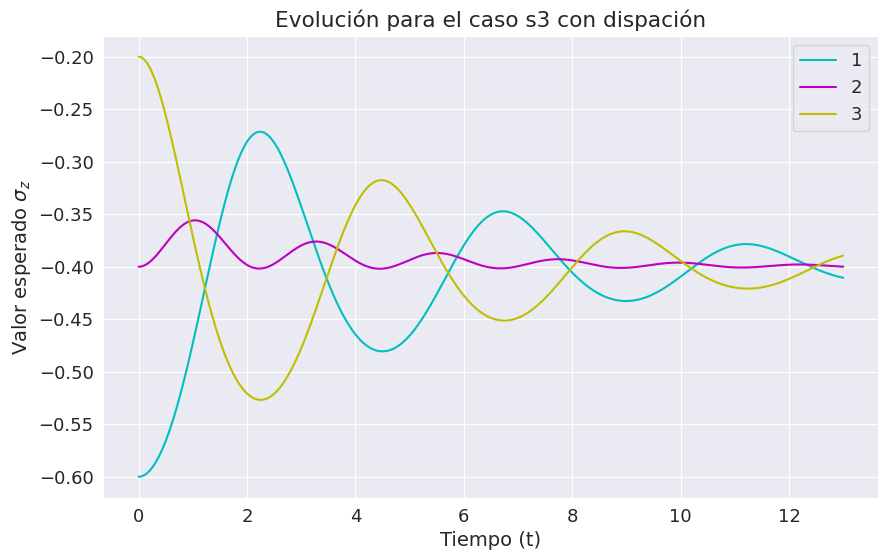

In [165]:
exp_sz_diss3 = expect(sz_list, result3_diss.states)
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_diss3[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_diss3[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_diss3[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s3 con dispación")
plt.savefig("Evolution_s3_diss")

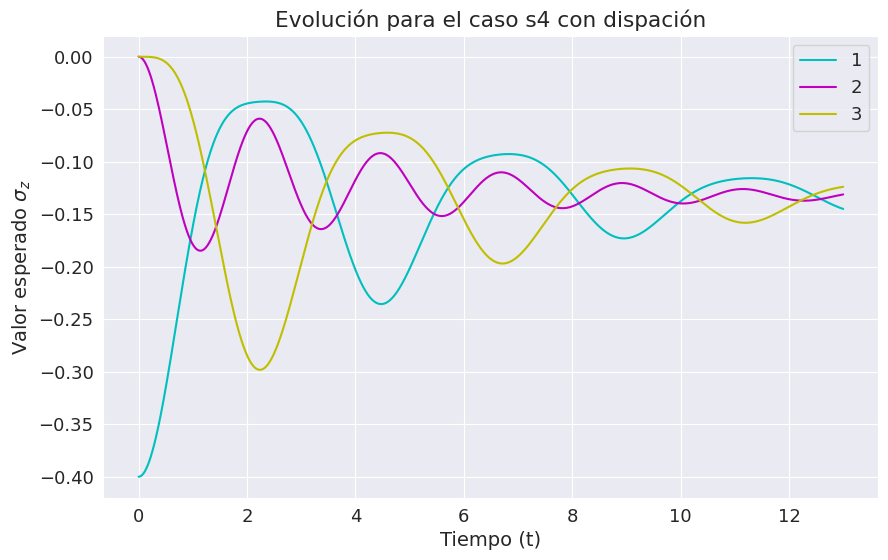

In [166]:
exp_sz_diss4 = expect(sz_list, result4_diss.states)
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_diss4[0] , label="1", color="c")
ax.plot(list(tlist), exp_sz_diss4[1] , label="2", color="m")
ax.plot(list(tlist), exp_sz_diss4[2] , label="3", color="y")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Valor esperado $\sigma_z$')
ax.set_title(f"Evolución para el caso s4 con dispación")
plt.savefig("Evolution_s4_diss")

## Population

In [167]:
num_rows = len(result1_diss.states)

population_s1_diss = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s1_diss[i] = result1_diss.states[i].diag()

population_s2_diss = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s2_diss[i] = result2_diss.states[i].diag()

population_s3_diss = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s3_diss[i] = result3_diss.states[i].diag()

population_s4_diss = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s4_diss[i] = result4_diss.states[i].diag()

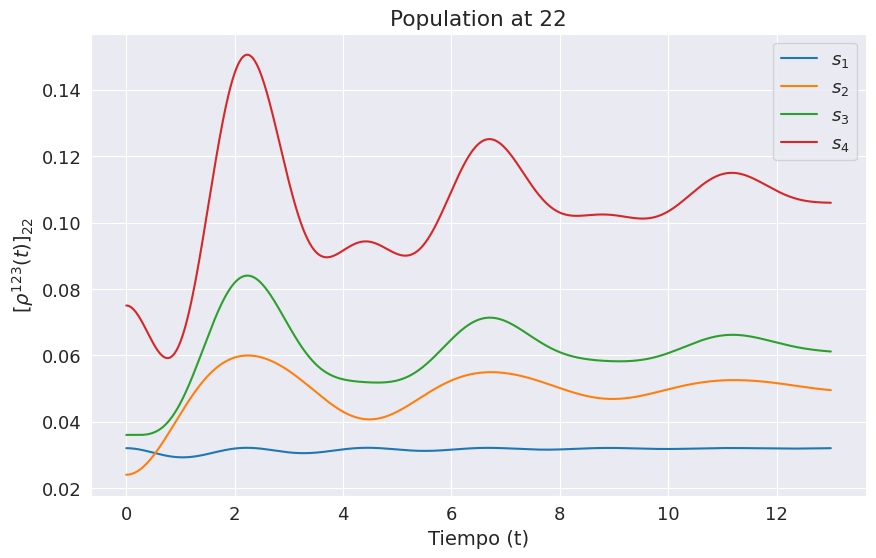

In [168]:
# Population at 22
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1_diss[:,1] , label=r"$s_1$")
ax.plot(list(tlist), population_s2_diss[:,1] , label=r"$s_2$")
ax.plot(list(tlist), population_s3_diss[:,1] , label=r"$s_3$")
ax.plot(list(tlist), population_s4_diss[:,1] , label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{22}$')
ax.set_title(f"Population at 22")
plt.savefig("Population22_diss")

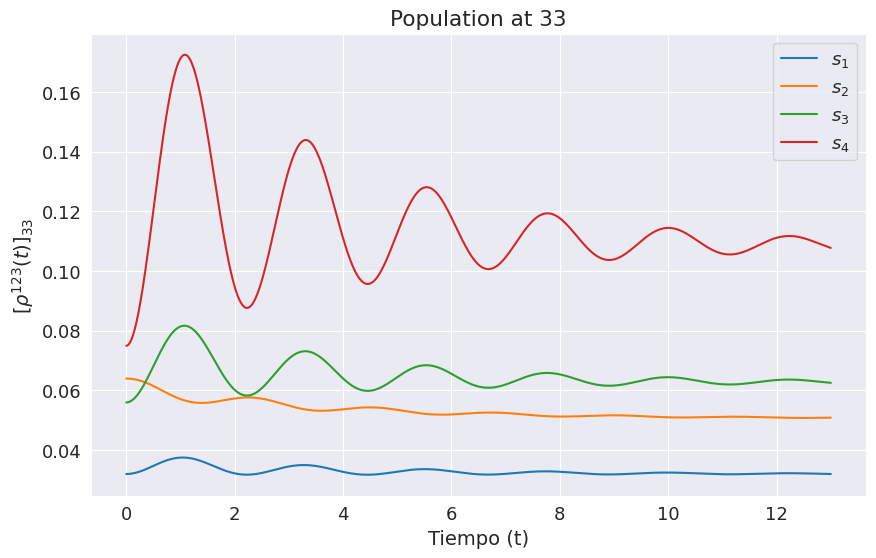

In [169]:
# Population at 33
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1_diss[:,2] , label=r"$s_1$")
ax.plot(list(tlist), population_s2_diss[:,2] , label=r"$s_2$")
ax.plot(list(tlist), population_s3_diss[:,2] , label=r"$s_3$")
ax.plot(list(tlist), population_s4_diss[:,2] , label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{33}$')
ax.set_title(f"Population at 33")
plt.savefig("Population33_diss")

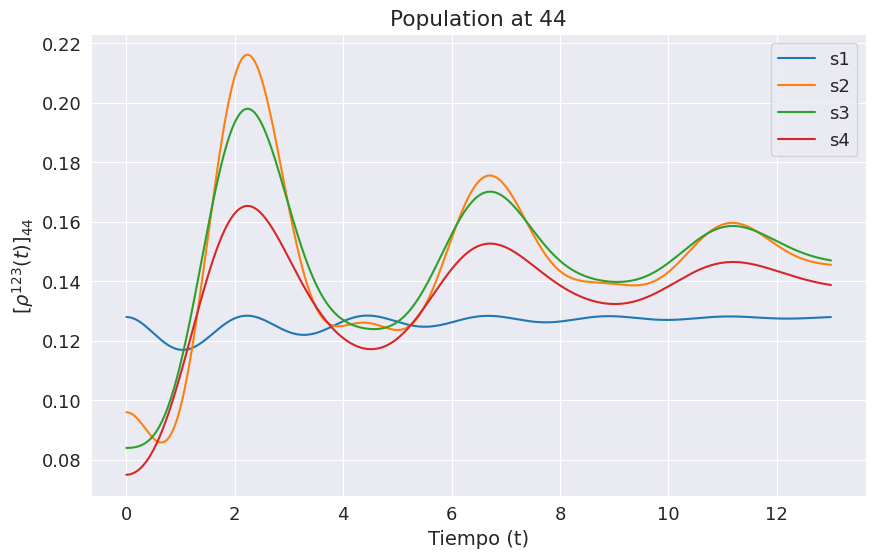

In [170]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1_diss[:,3] , label="s1")
ax.plot(list(tlist), population_s2_diss[:,3] , label="s2")
ax.plot(list(tlist), population_s3_diss[:,3] , label="s3")
ax.plot(list(tlist), population_s4_diss[:,3] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{44}$')
ax.set_title(f"Population at 44")
plt.savefig("Population44_diss")

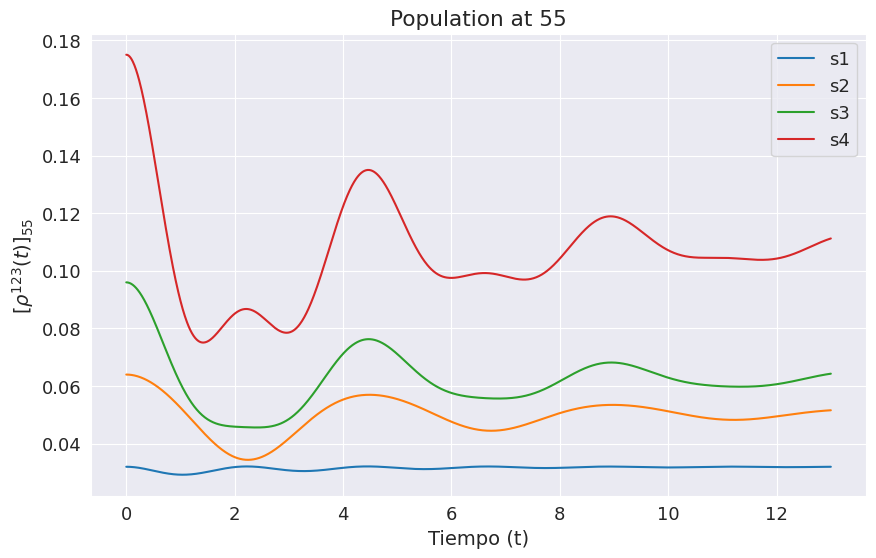

In [171]:
# Population at 55
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1_diss[:,4] , label="s1")
ax.plot(list(tlist), population_s2_diss[:,4] , label="s2")
ax.plot(list(tlist), population_s3_diss[:,4] , label="s3")
ax.plot(list(tlist), population_s4_diss[:,4] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{55}$')
ax.set_title(f"Population at 55")
plt.savefig("Population55_diss")

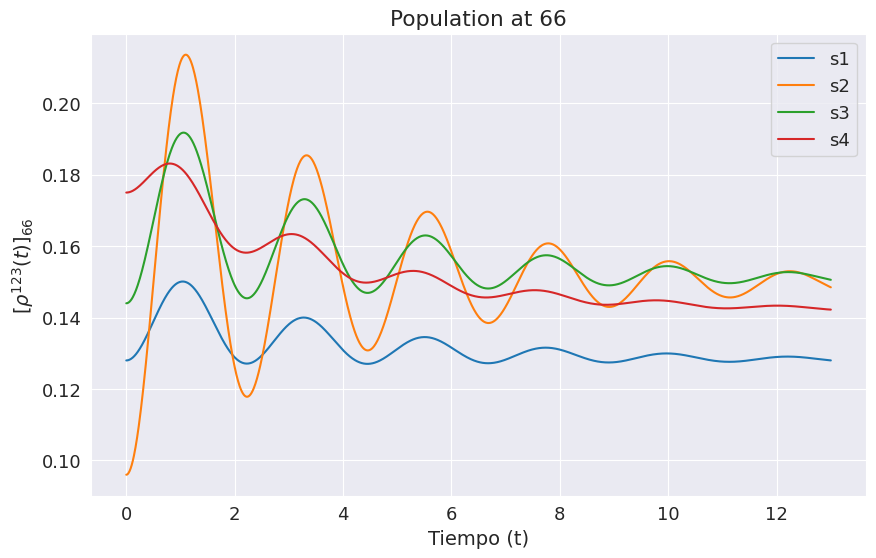

In [172]:
# Population at 66
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1_diss[:,5] , label="s1")
ax.plot(list(tlist), population_s2_diss[:,5] , label="s2")
ax.plot(list(tlist), population_s3_diss[:,5] , label="s3")
ax.plot(list(tlist), population_s4_diss[:,5] , label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$[\rho^{123}(t)]_{66}$')
ax.set_title(f"Population at 66")
plt.savefig("Population66_diss")

## von Neumann entropy

In [173]:
from scipy.linalg import logm, expm

In [174]:
def neuman_entropy(result):

  num_rows = len(result.states)
  neuman_entropy = np.empty(num_rows)

  for i in range(num_rows):
    rho = result.states[i].full()

    rho_log = np.matmul(rho, np.log2(rho))
    neuman_entropy[i] = -np.trace(rho_log)

  return neuman_entropy

In [175]:
entropy_s1_diss = neuman_entropy(result1_diss)
entropy_s2_diss = neuman_entropy(result2_diss)
entropy_s3_diss = neuman_entropy(result3_diss)
entropy_s4_diss = neuman_entropy(result4_diss)

<ipython-input-174-6b012c695e0a>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  neuman_entropy[i] = -np.trace(rho_log)


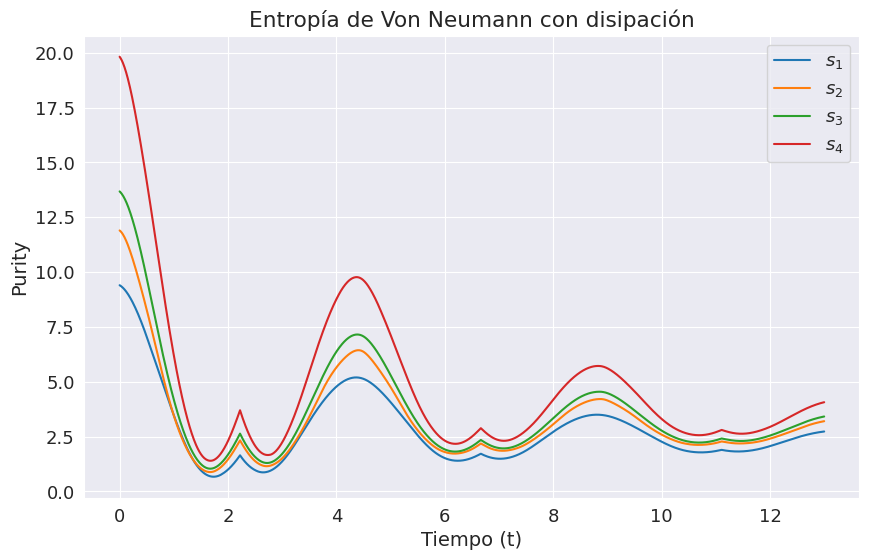

In [176]:
# Von Neuman entorpy as funtion of time
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), entropy_s1_diss ,  label=r"$s_1$")
ax.plot(list(tlist), entropy_s2_diss ,  label=r"$s_2$")
ax.plot(list(tlist), entropy_s3_diss ,  label=r"$s_3$")
ax.plot(list(tlist), entropy_s4_diss ,  label=r"$s_4$")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'Purity')
ax.set_title(f"Entropía de Von Neumann con disipación")
plt.savefig("Entropy_diss")

## Concurrence betwwen 2 qbits

In [177]:
def concurrence(eigenvalues):
  lambda1 = eigenvalues.max()
  ls_eigen = list(eigenvalues)
  ls_eigen.remove(max(ls_eigen))
  diference = lambda1 - sum(ls_eigen)

  return max(-diference,0 )

In [178]:
def flip_matrix(rho, A, B):
  sigmay_2 = tensor(sigmay(), sigmay())
  rho_ij = rho.ptrace([A,B]).conj()
  fliped = sigmay_2 * rho_ij * sigmay_2

  return fliped

In [179]:
con_12_s1 = []
for i in range(len(result1.states)):
  rhoFliped = flip_matrix(result1_diss.states[i], 0,1)
  rho_rhoFliped = result1_diss.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s1.append(concurrence(values))

con_12_s2 = []
for i in range(len(result2.states)):
  rhoFliped = flip_matrix(result2_diss.states[i], 0,1)
  rho_rhoFliped = result2_diss.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s2.append(concurrence(values))

con_12_s3 = []
for i in range(len(result3.states)):
  rhoFliped = flip_matrix(result3_diss.states[i], 0,1)
  rho_rhoFliped = result3_diss.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s3.append(concurrence(values))

con_12_s4 = []
for i in range(len(result4.states)):
  rhoFliped = flip_matrix(result4_diss.states[i], 0,1)
  rho_rhoFliped = result4_diss.states[i].ptrace([0,1]) * rhoFliped
  values =  np.sqrt(rho_rhoFliped.eigenenergies())
  con_12_s4.append(concurrence(values))

In [180]:
def positive(a):
  return max(a,0)

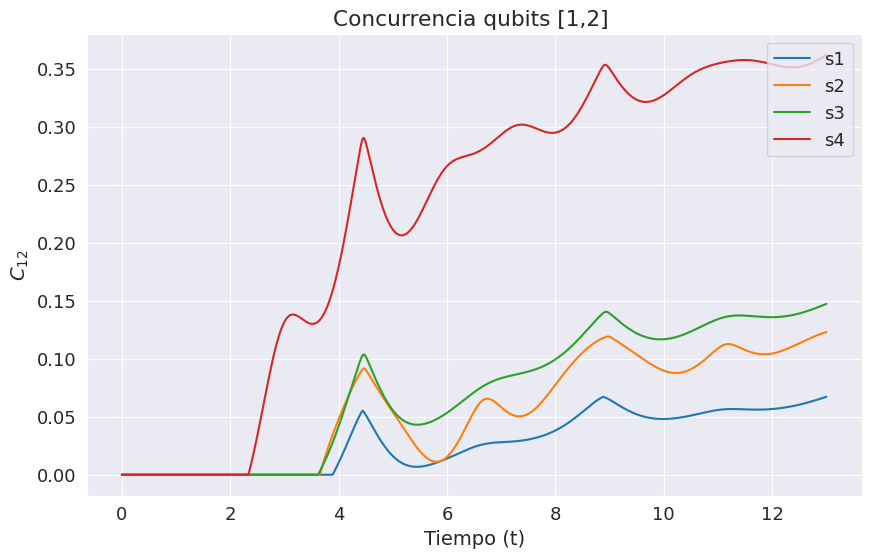

In [181]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), [positive(i) for i in (con_12_s1 - con_12_s1[0])], label="s1")
ax.plot(list(tlist), [positive(i) for i in (con_12_s2 - con_12_s2[0])], label="s2")
ax.plot(list(tlist), [positive(i) for i in (con_12_s3 - con_12_s3[0])], label="s3")
ax.plot(list(tlist), [positive(i) for i in (con_12_s4 - con_12_s4[0])], label="s4")

ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{12}$')
ax.set_title(f"Concurrencia qubits [1,2] ")
plt.savefig("Concurrence12_diss")

## Concurrence in three qubits

In [182]:
cc1 = []
for i in range(len(result1_diss.states)):
  sub_traz = result1_diss.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2_diss.states)):
  sub_traz = result2_diss.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3_diss.states)):
  sub_traz = result3_diss.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4_diss.states)):
  sub_traz = result4_diss.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

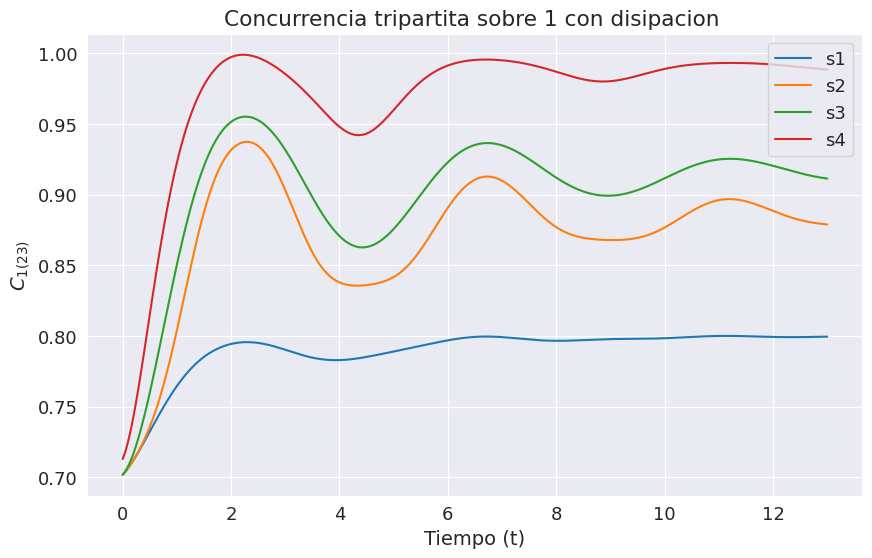

In [183]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s2")
ax.plot(list(tlist), cc3 , label="s3")
ax.plot(list(tlist), cc4 , label="s4")


ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{1(23)}$')
ax.set_title(f"Concurrencia tripartita sobre 1 con disipacion ")
plt.savefig("Concurrence1_diss")

In [184]:
cc1_diss = []
for i in range(len(result1_diss.states)):
  sub_traz = result1_diss.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1_diss.append(tra_power)

cc2_diss = []
for i in range(len(result2_diss.states)):
  sub_traz = result2_diss.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2_diss.append(tra_power)

cc3_diss = []
for i in range(len(result3_diss.states)):
  sub_traz = result3_diss.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3_diss.append(tra_power)

cc4_diss = []
for i in range(len(result4_diss.states)):
  sub_traz = result4_diss.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4_diss.append(tra_power)

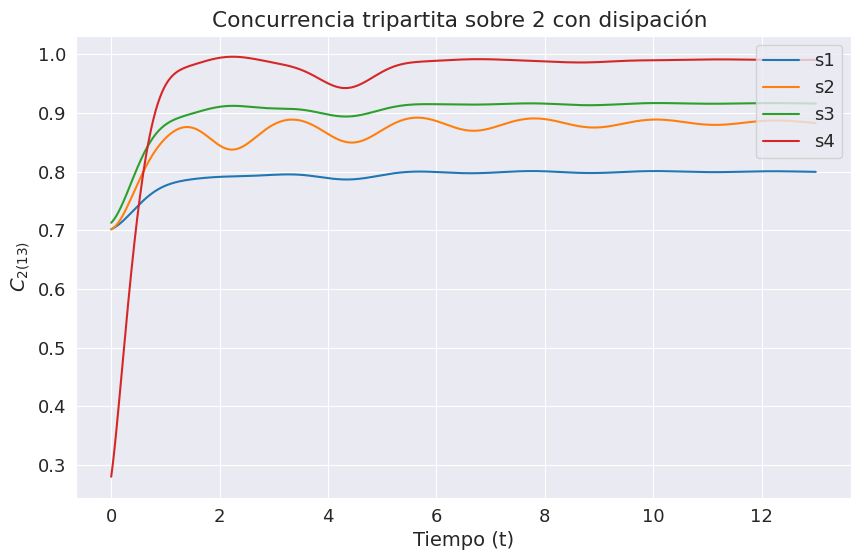

In [185]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1_diss , label="s1")
ax.plot(list(tlist), cc2_diss , label="s2")
ax.plot(list(tlist), cc3_diss , label="s3")
ax.plot(list(tlist), cc4_diss , label="s4")


ax.legend(loc=1)
ax.set_xlabel(r'Tiempo (t)')
ax.set_ylabel(r'$C_{2(13)}$')
ax.set_title(f"Concurrencia tripartita sobre 2 con disipación ")
plt.savefig("Concurrence2_diss")